In [1]:
!pwd

/panda/eedy/ion_los-angle/s1_a166/notebook


In [2]:
from mintpy.objects import ramp
from mintpy.utils import ptime, readfile, writefile
import h5py
import numpy as np
from matplotlib import pyplot as plt, colorbar, ticker, colors
from mintpy.utils import ptime, readfile, writefile
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

In [3]:
######### split

In [4]:
path_split = '../mintpy_split_ion_upsample/geo/geo_ion-split.h5'

In [5]:
!reference_point.py ../mintpy_split_ion_upsample/geo/geo_ion-split.h5 -y 180 -x 190
!reference_date.py ../mintpy_split_ion_upsample/geo/geo_ion-split.h5 --ref-date 20180920

--------------------------------------------------
input reference point in y/x: (180, 190)
--------------------------------------------------
SAME reference pixel is already selected/saved in file, skip updating.
input reference date: 20180920
--------------------------------------------------
change reference date for file: /panda/eedy/ion_los-angle/s1_a166/mintpy_split_ion_upsample/geo/geo_ion-split.h5
input refDate is the same as the existing REF_DATE.
Nothing to be done.
time used: 00 mins 1.0 secs.


In [6]:
timeseries_split = readfile.read(path_split, datasetName='timeseries')[0]
timeseries_split = np.squeeze(timeseries_split)
data_out, ramp = ramp.deramp(timeseries_split, mask_in=None, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [7]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_split = np.zeros(timeseries_split.shape[0])
slope_ion_split_dongxifangxiang = np.zeros(timeseries_split.shape[0])
slope_ion_split_nanbeifangxiang = np.zeros(timeseries_split.shape[0])
angle_deg_ion_split = np.zeros(timeseries_split.shape[0])
meta = readfile.read_attribute(path_split)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_split.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( mm(ion)/ km(juli)):', magnitude*1e6)
    print('The direction of the gradient is:', direction)

    slope_ion_split[i] = magnitude*1e6
    angle_deg_ion_split[i] = direction
    slope_ion_split_dongxifangxiang[i] = dy*1e6
    slope_ion_split_nanbeifangxiang[i] = dx*1e6

    print(i)


The equation of the fit plane is: Z = 0.0003457930877137232 * X + 8.058180455748297e-05 * Y + -0.08024924211404146
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.2496947108224476
The direction of the gradient is: 152.49818021572628
0
The equation of the fit plane is: Z = 0.0002756203519583873 * X + 0.00016232505227372745 * Y + -0.08191465335976204
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.29174046899185707
The direction of the gradient is: 127.23626191808887
1
The equation of the fit plane is: Z = 0.00014243056729338057 * X + 9.417532968206078e-05 * Y + -0.045868858621358206
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.16272920194987026
The direction of the gradient is: 124.0972478236539
2
The equation of the fit plane is: Z = 0.0002544940248372562 * X + 0.00011738959121929348 * Y + -0.06967343988565126
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.23405940502610945
The direction of the gradient is: 134.13984574940332
3
The equation of the fi

In [8]:
######### GIM

In [9]:
path_GIM = '../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5'

In [10]:
!reference_point.py ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 -y 180 -x 190
!reference_date.py ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 --ref-date 20180920

--------------------------------------------------
input reference point in y/x: (180, 190)
--------------------------------------------------
calculating the temporal average of timeseries file: ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5
reading timeseries data from file: ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 ...
/home/eedy/tools/MintPy/src/mintpy/objects/stack.py:455: RuntimeWarning: Mean of empty slice
  dmean = np.nanmean(data, axis=0)
updating dataset values without re-writing to a new file
update metadata
input reference date: 20180920
--------------------------------------------------
change reference date for file: /panda/eedy/ion_los-angle/s1_a166/mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5
reading data ...
referencing in time ...
--------------------------------------------------
open  HDF5 file /panda/eedy/ion_los-angle/s1_a166/mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 in r+ mode
writing dataset /timeseries                block: (0, 159, 0, 825, 0, 313)
close HDF5

In [11]:
timeseries_GIM = readfile.read(path_GIM, datasetName='timeseries')[0]
timeseries_GIM = np.squeeze(timeseries_GIM)
from mintpy.objects import ramp
data_out, ramp = ramp.deramp(timeseries_GIM, mask_in=None, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [12]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_GIM = np.zeros(timeseries_GIM.shape[0])
slope_ion_GIM_dongxifangxiang = np.zeros(timeseries_GIM.shape[0])
slope_ion_GIM_nanbeifangxiang = np.zeros(timeseries_GIM.shape[0])
angle_deg_ion_GIM = np.zeros(timeseries_GIM.shape[0])
meta = readfile.read_attribute(path_GIM)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_GIM.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( mm(ion)/ km(juli)):', magnitude*1e6)
    print('The direction of the gradient is:', direction)

    slope_ion_GIM[i] = magnitude*1e6
    angle_deg_ion_GIM[i] = direction
    slope_ion_GIM_dongxifangxiang[i] = dy*1e6
    slope_ion_GIM_nanbeifangxiang[i] = dx*1e6

    print(i)


The equation of the fit plane is: Z = 7.968782467430489e-05 * X + 6.0063872596928454e-05 * Y + -0.02604322438073149
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.09995739687304696
The direction of the gradient is: 120.70466567924484
0
The equation of the fit plane is: Z = 7.789145956287378e-05 * X + 0.0001243805985782191 * Y + -0.03658684074435668
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.1848343379602528
The direction of the gradient is: 105.65902193264805
1
The equation of the fit plane is: Z = 4.131679731389746e-05 * X + 2.0680925536317266e-05 * Y + -0.011206372607544129
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.039698675437791694
The direction of the gradient is: 131.80520246913665
2
The equation of the fit plane is: Z = 6.85555338157152e-05 * X + 4.835097681970185e-05 * Y + -0.021196697377115072
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.08194234780081137
The direction of the gradient is: 122.40204837213315
3
The equation of the f

In [13]:
with h5py.File(path_GIM, 'r') as file:
    date_GIM = file['date']
    date_GIM = date_GIM[()]
date_GIM = np.char.decode(date_GIM)

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

slope_ion_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_correct[i] = slope_ion_GIM[j[0]]
slope_ion_GIM = slope_ion_GIM_correct

angle_deg_ion_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        angle_deg_ion_GIM_correct[i] = angle_deg_ion_GIM[j[0]]
angle_deg_ion_GIM = angle_deg_ion_GIM_correct

slope_ion_GIM_dongxifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_dongxifangxiang_correct[i] = slope_ion_GIM_dongxifangxiang[j[0]]
slope_ion_GIM_dongxifangxiang = slope_ion_GIM_dongxifangxiang_correct

slope_ion_GIM_nanbeifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_nanbeifangxiang_correct[i] = slope_ion_GIM_nanbeifangxiang[j[0]]
slope_ion_GIM_nanbeifangxiang = slope_ion_GIM_nanbeifangxiang_correct

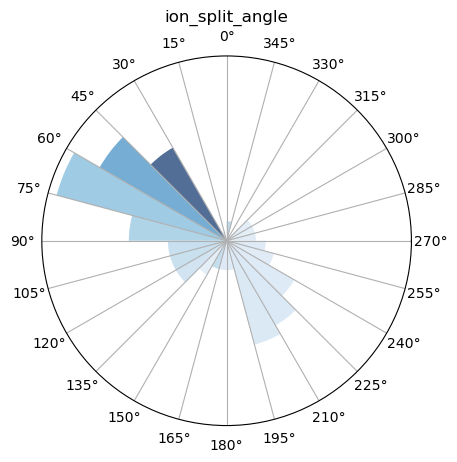

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import binned_statistic

# 假设 angle_deg_ion_split 和 slope_ion_GIM 是已经定义好的 numpy 数组
# 转换为弧度
ion_split_angle_deg_rad = np.deg2rad(angle_deg_ion_split)

# 计算每个bin中的均值
bin_means, bin_edges, _ = binned_statistic(ion_split_angle_deg_rad, slope_ion_split, statistic='mean', bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12))

# 从蓝色颜色图中取颜色，bin_means / bin_means.max() 使均值在 0-1 之间，以便映射到颜色的深浅
colors = plt.get_cmap('Blues')(bin_means / np.nanmax(bin_means))

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图，颜色由均值决定
n, bins, patches = ax.hist(ion_split_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7)

# 清除常规极坐标图的细节
ax.set_yticklabels([])  # 删除y轴标签
ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['270°','285°', '300°','315°', '330°','345°' ,'0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°'])

# 设置直方图的颜色
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

ax.grid(True)  # 显示网格线
ax.set_title('ion_split_angle')
plt.show()

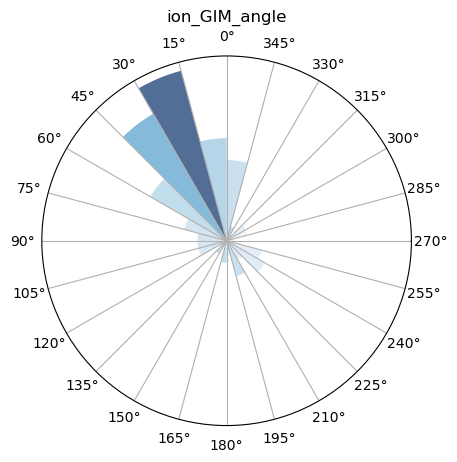

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import binned_statistic

# 假设 angle_deg_ion_split 和 slope_ion_GIM 是已经定义好的 numpy 数组
# 转换为弧度
ion_GIM_angle_deg_rad = np.deg2rad(angle_deg_ion_GIM)

# 计算每个bin中的均值
bin_means, bin_edges, _ = binned_statistic(ion_GIM_angle_deg_rad, slope_ion_GIM, statistic='mean', bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12))

# 从蓝色颜色图中取颜色，bin_means / bin_means.max() 使均值在 0-1 之间，以便映射到颜色的深浅
colors = plt.get_cmap('Blues')(bin_means / np.nanmax(bin_means))

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图，颜色由均值决定
n, bins, patches = ax.hist(ion_GIM_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7)

# 清除常规极坐标图的细节
ax.set_yticklabels([])  # 删除y轴标签
ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['270°','285°', '300°','315°', '330°','345°' ,'0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°'])

# 设置直方图的颜色
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

ax.grid(True)  # 显示网格线
ax.set_title('ion_GIM_angle')
plt.show()

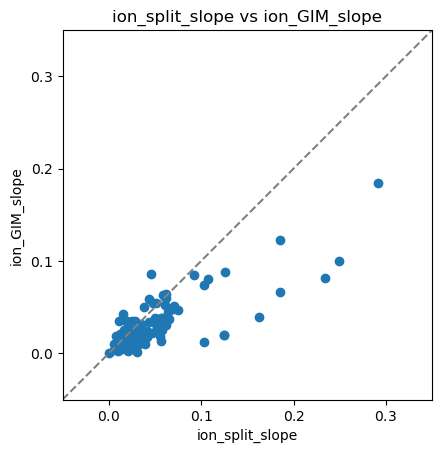

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split, slope_ion_GIM)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope')
plt.ylabel('ion_GIM_slope')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.05,0.35]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

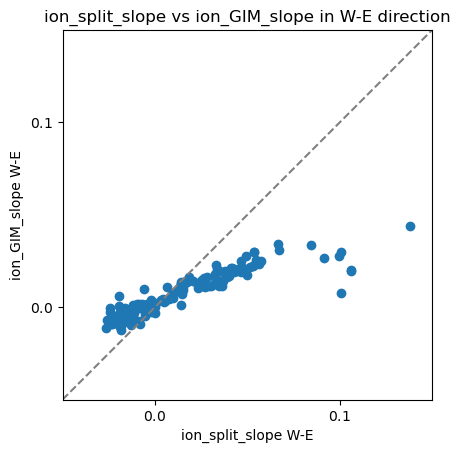

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_dongxifangxiang, slope_ion_GIM_dongxifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope W-E')
plt.ylabel('ion_GIM_slope W-E')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope in W-E direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.05, 0.15]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

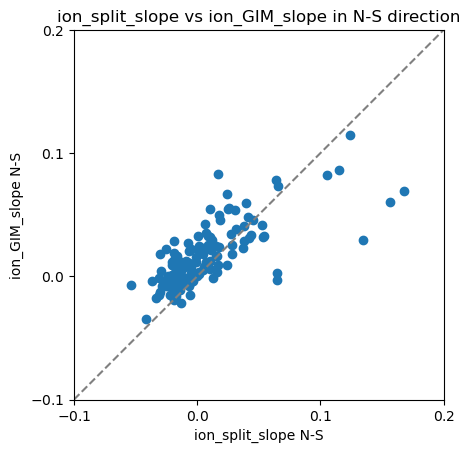

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_nanbeifangxiang, slope_ion_GIM_nanbeifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope N-S')
plt.ylabel('ion_GIM_slope N-S')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope in N-S direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.1, 0.2]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

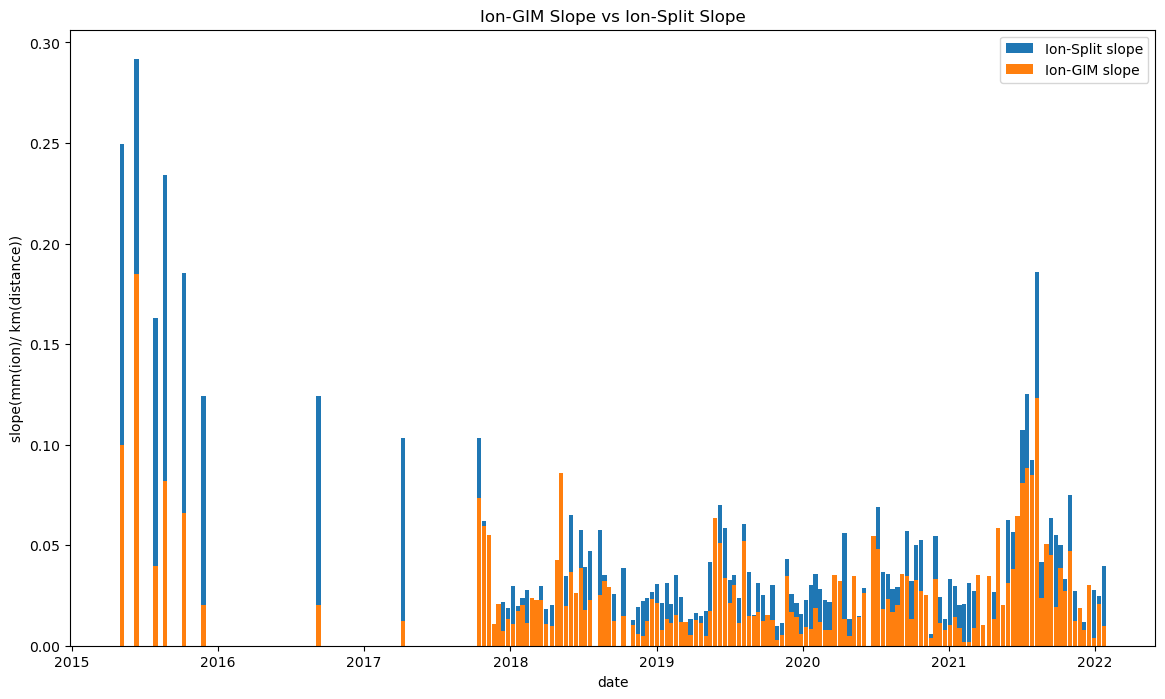

In [19]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split, width, label='Ion-Split slope', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM, width, label='Ion-GIM slope', alpha=1)  # 增加一个宽度的偏移量

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope(mm(ion)/ km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope')
ax.legend()

plt.show()

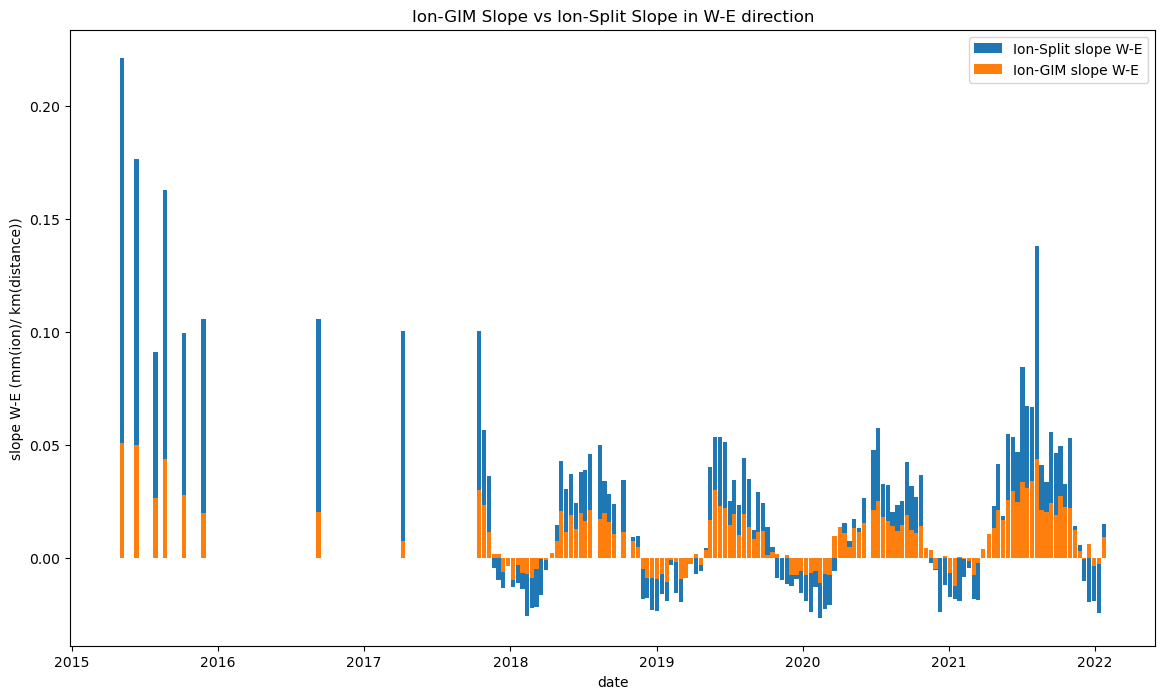

In [29]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_dongxifangxiang, width, label='Ion-Split slope W-E', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_dongxifangxiang, width, label='Ion-GIM slope W-E', alpha=1)  # 增加一个宽度的偏移量

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope W-E (mm(ion)/ km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope in W-E direction')
ax.legend()

plt.show()

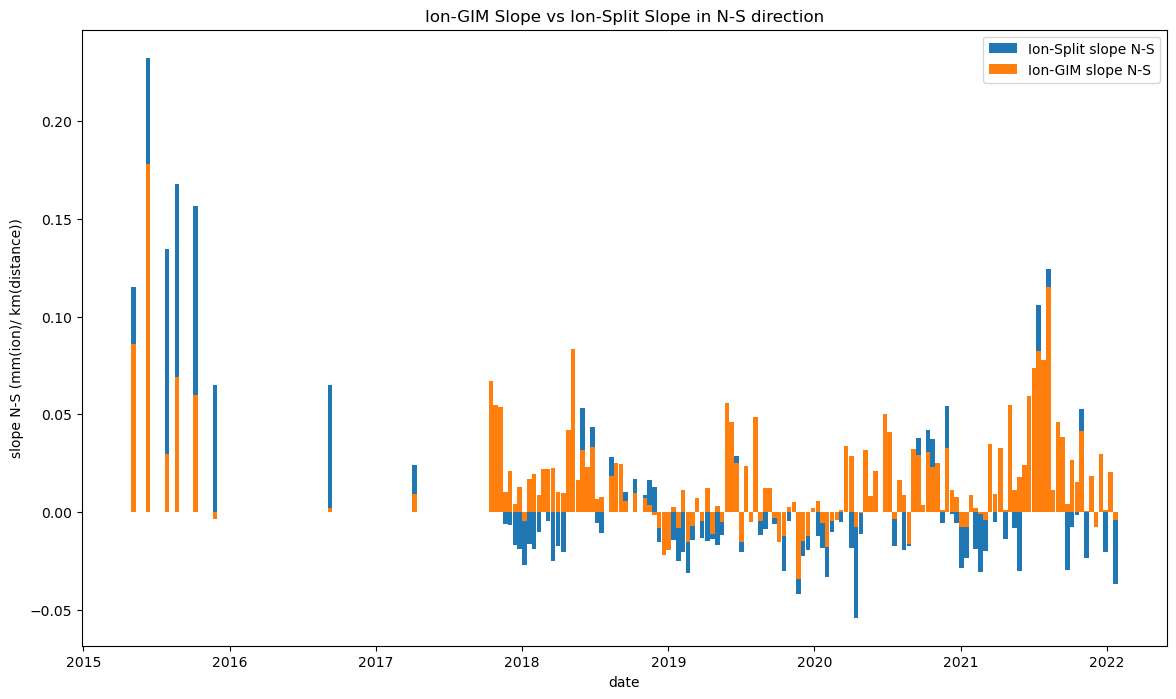

In [30]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_nanbeifangxiang, width, label='Ion-Split slope N-S', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_nanbeifangxiang, width, label='Ion-GIM slope N-S', alpha=1)  # 增加一个宽度的偏移量

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope N-S (mm(ion)/ km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope in N-S direction')
ax.legend()

plt.show()

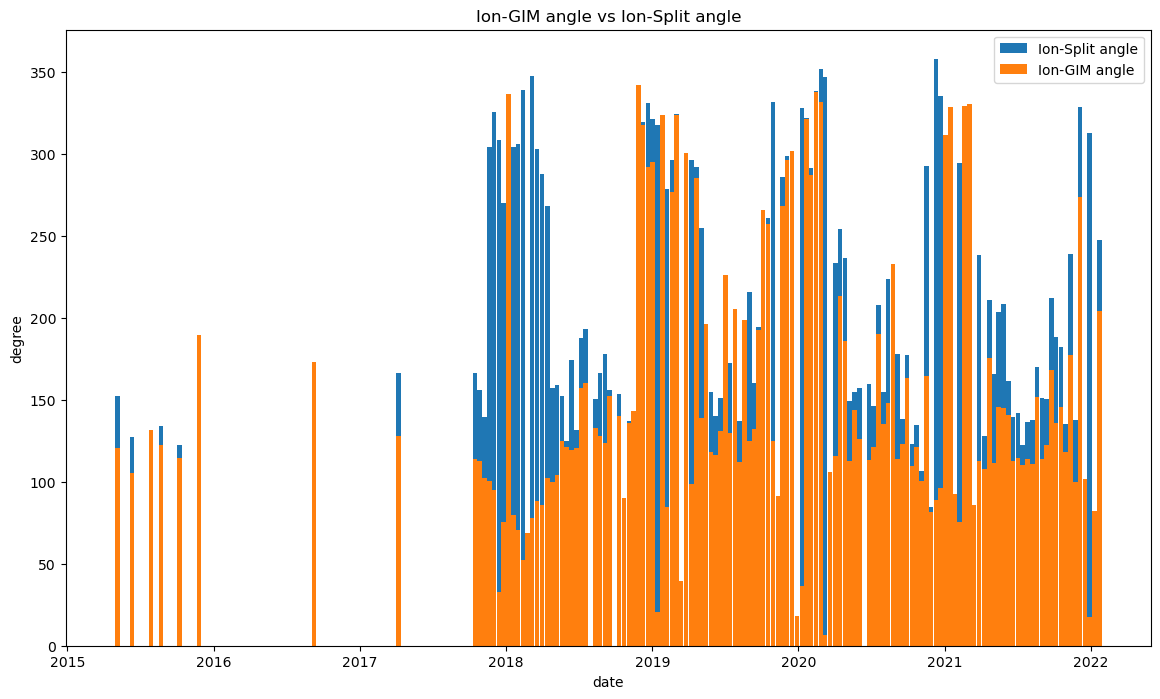

In [22]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, angle_deg_ion_split, width, label='Ion-Split angle', alpha=1)
ax.bar(date_GIM_numeric, angle_deg_ion_GIM, width, label='Ion-GIM angle', alpha=1)  # 增加一个宽度的偏移量

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('degree')
ax.set_title('Ion-GIM angle vs Ion-Split angle')
ax.legend()

plt.show()